# Swarm algorithms usage demo

*Source: [Swarm Algorithms implementation](https://github.com/AlexanderKlanovets/swarm_algorithms) repository*

At the moment, this repository has implementations of such algorithms as:
- Particle Swarm optimization ([paper](https://ieeexplore.ieee.org/document/488968));
- Cuckoo Search ([paper](https://ieeexplore.ieee.org/document/5393690));
- Firefly (Algorithm [paper](https://arxiv.org/abs/1312.6609));
- Bat Search ([paper](https://arxiv.org/abs/1004.4170));
- Gravitational (Search [paper](https://www.sciencedirect.com/science/article/pii/S0020025509001200));
- Harmony Search ([paper](https://arxiv.org/ftp/arxiv/papers/1003/1003.1599.pdf)).

The algorithms above are single objective optimization algorithms, designed for unconstrained continous optimization problems.

### Import dependencies

Firstly, let's import all the necessary packages. 3rd party modules include:
- [numpy](https://numpy.org/) - a library for dealing with vectors, matrices and linear algebra in general;
- [matplotlib](https://matplotlib.org/) - a library for visualizing optimization processes.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Now, let's import test objective functions and utility for visualizing the optimizaition process:

In [2]:
# Add project root folder to module loading paths.
import sys
sys.path.append('..')

import utils.test_functions as test_fns # test objective functions
from utils.optimization_visualization import visualize_optimization

### Basic usage

Now, we're going to import models' classes and perform optimizations for some test functions.

In [3]:
# Importing models' classes and named tuples to set parameters.
from models.single_objective.pso import PSO, PSOParams
from models.single_objective.cuckoo_search import CuckooSearch, CuckooSearchParams
from models.single_objective.firefly_algorithm import FireflyAlgorithm, FireflyAlgorithmParams
from models.single_objective.bat_search import BatSearch, BatSearchParams
from models.single_objective.gravitational_search import GravitationalSearch, GravitationalSearchParams
from models.single_objective.harmony_search import HarmonySearch, HarmonySearchParams

Here, we're defining a problem, set the behavioural parameters for the models and perform optimization. Problem definition means defining the objective function, it's dimensionality and search space bounds:

In [4]:
D = 5 # problem dimensionality
fit_func = test_fns.sphere # objective function (fitness function in this case)
bounds = [np.full(D, -500), np.full(D, 500)] # search space bounds

Next, we create the models by initializing them with their parameters. The parameter choice depends on the optimization problem and sometimes can be a tricky task to do:

In [5]:
N = 50 # population size for each model
SEED = 1111

# Particle Search Optimization
p_params = PSOParams(
    w=0.5,
    c1=1.5,
    c2=1.5
)
p = PSO(D, N, fit_func, p_params, bounds, SEED)
p.optimize()
print(p.info())
print()

# Cuckoo Search
c_params = CuckooSearchParams(
    xi=0.1,
    alpha=1
)
c = CuckooSearch(D, N, fit_func, c_params, bounds, SEED)
c.optimize()
print(c.info())
print()

# Firefly Algorithm
f_params = FireflyAlgorithmParams(
    beta_0=2,
    alpha_0=0.1,
    alpha_inf=0,
    gamma=0.5,
    lambd=0.9
)
f = FireflyAlgorithm(D, N, fit_func, f_params, bounds, SEED)
f.optimize()
print(f.info())
print()

# Bat Search
b_params = BatSearchParams(
    fmin=0,
    fmax=2,
    sigma=0.1,
    A_0=1.0,
    r_0=0.1,
    alpha=0.99,
    gamma=0.95
)
b = BatSearch(D, N, fit_func, b_params, bounds, SEED)
b.optimize()
print(b.info())
print()

# Gravitational Search
g_params = GravitationalSearchParams(
    G0=100,
    alpha=2
)
g = GravitationalSearch(D, N, fit_func, g_params, bounds, SEED)
g.optimize()
print(g.info())
print()

# Harmony Search
h_params = HarmonySearchParams(
    r_accept=0.8,
    r_pa=0.3,
    b_range=0.01
)
h = HarmonySearch(D, N, fit_func, h_params, bounds, SEED)
h.optimize()
print(h.info())

Algorithm: PSO
Best position: [ 3.11268181e-08  4.89666747e-08 -4.07824391e-08  8.89582081e-08
 -5.92494212e-08]
Best score: 1.6453878081950857e-14
Fitness function evaluatiions number: 5050

Algorithm: CuckooSearch
Best position: [-0.00804517  0.00260933 -0.00371034  0.01049265 -0.00016467]
Best score: 0.00019542287625741943
Fitness function evaluatiions number: 10050

Algorithm: FireflyAlgorithm
Best position: [ 0.00187235  0.00261799 -0.00248657 -0.01503275  0.00047986]
Best score: 0.00024275631197402935
Fitness function evaluatiions number: 5050

Algorithm: BatSearch
Best position: [-0.00471772 -0.00192653  0.00800673 -0.00636046  0.00995263]
Best score: 0.0002295865943518311
Fitness function evaluatiions number: 5050

Algorithm: GravitationalSearch
Best position: [ 0.01077288 -0.01039955 -0.02104286 -0.02170866 -0.00109391]
Best score: 0.0011394704282698177
Fitness function evaluatiions number: 5050

Algorithm: HarmonySearch
Best position: [-0.3876637  -0.09092796  0.02705    -0.1

The results of the optimization highly depend on the models' hyperparameters (behavioural parameters). Sometimes particles may stuck in the local optima, so the result is not satisfying. You may try to tweak the parameters' values to improve the results.

Of course, there's also a probability of me implementing some of the algorithms' steps incorrectly, so feel free to comment on the code :)

### Optimization visualization

Let's now see how exactly particles move in the search space. We're going to define new problem and new models.

<IPython.core.display.Javascript object>


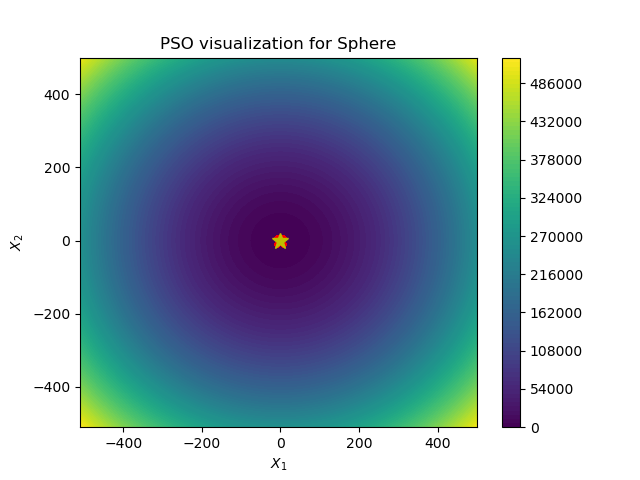

<IPython.core.display.Javascript object>


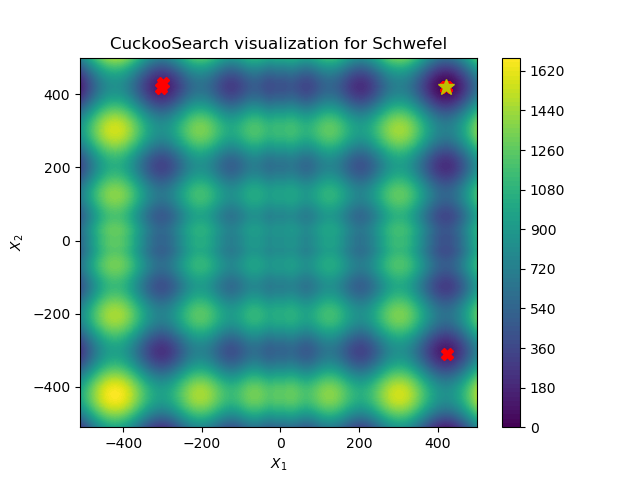

<IPython.core.display.Javascript object>


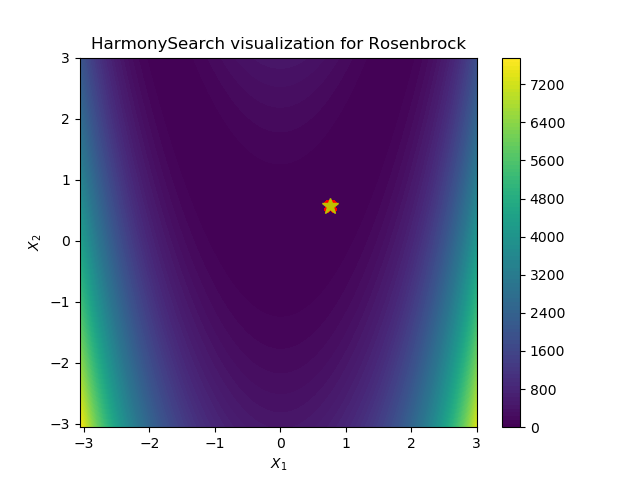

In [7]:
%matplotlib notebook

D = 2 # problems' dimensionality

# FIRST ANIMATION
fit_func_1 = test_fns.sphere # objective function (fitness function in this case)
bounds_1 = [np.full(D, -500), np.full(D, 500)] # search space bounds

N_1 = 20

# Particle Search Optimization
p_params = PSOParams(
    w=0.5,
    c1=1.5,
    c2=1.5
)
p = PSO(D, N_1, fit_func_1, p_params, bounds_1, SEED)
anim_1 = visualize_optimization(p)

# SECOND ANIMATION
fit_func_2 = test_fns.schwefel # objective function (fitness function in this case)
bounds_2 = [np.full(D, -500), np.full(D, 500)] # search space bounds

N_2 = 20

# Cuckoo Search
c_params = CuckooSearchParams(
    xi=0.1,
    alpha=1
)
c = CuckooSearch(D, N_2, fit_func_2, c_params, bounds_2, SEED)
anim_2 = visualize_optimization(c)

# THIRD ANIMATION
fit_func_3 = test_fns.rosenbrock # objective function (fitness function in this case)
bounds_3 = [np.full(D, -3), np.full(D, 3)] # search space bounds

N_3 = 20

# Harmony Search
h_params = HarmonySearchParams(
    r_accept=0.8,
    r_pa=0.3,
    b_range=0.01
)
h = HarmonySearch(D, N_3, fit_func_3, h_params, bounds_3, SEED)
anim_3 = visualize_optimization(h)

plt.show()